In [1]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.3 MB/s eta 0:00:00


In [2]:
from google_play_scraper import app, reviews
import pandas as pd
import datetime

In [3]:
from google_play_scraper import reviews, Sort

app_id = 'com.oxygen.selfcare'

def get_reviews(app_id, lang='id', count=1000, sort=Sort.NEWEST, filter_device_with=None, continuation_token=None, filter_score_with=None):
  try:
    result, continuation_token = reviews(
      app_id,
      lang=lang,
      country='id',
      sort=sort,
      count=count,
      filter_score_with=filter_score_with,
      filter_device_with=filter_device_with,
      continuation_token=continuation_token
    )

    return result, continuation_token
  except Exception as e:
    print("Error: ", e)
    return None, None



reviews, continuation_token = get_reviews(app_id)

if reviews is not None:
  print("Jumlah ulasan:", len(reviews))
  if len(reviews) > 0:
    print("Contoh ulasan:")
    print(reviews[0])

else:
  print("Tidak dapat mengambil ulasan")


Jumlah ulasan: 891
Contoh ulasan:
{'reviewId': 'dc042ba2-62fe-4098-82f8-ad6e37592943', 'userName': 'pikirii', 'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjWvHu1Rb2RbB71Ag5HkPvNe4WermiNWybz9BvBrHm5qPj24TLry', 'content': 'ini respon nya memang selama itu?, setiap bayar pasti nunggu 1-2jam biar internet nya idup lagi. bisakah diperbaikan atas reponnya?', 'score': 1, 'thumbsUpCount': 0, 'reviewCreatedVersion': '5.0.10', 'at': datetime.datetime(2025, 4, 6, 1, 38, 3), 'replyContent': None, 'repliedAt': None, 'appVersion': '5.0.10'}


In [4]:
import csv

def export_to_csv(reviews, file_name='hasil_scraper_ulasan_app_selfcareoxygen.csv'):
  if reviews:
    fieldnames =['Review ID','Username', 'Rating', 'Review Text', 'Date']

    with open(file_name, 'w', newline='', encoding='utf-8') as csvfile:
      writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
      writer.writeheader()

      for review in reviews:
        writer.writerow({
          'Review ID': review['reviewId'],
          'Username': review['userName'],
          'Rating': review['score'],
          'Review Text': review['content'],
          'Date': review['at']
        })

    print(f"Data berhasil diekspor ke '{file_name}'")
  else:
    print("Tidak ada data ulasan untuk diekspor.")

export_to_csv(reviews)

Data berhasil diekspor ke 'hasil_scraper_ulasan_app_selfcareoxygen.csv'


In [5]:
import pandas as pd

data= pd.read_csv('hasil_scraper_ulasan_app_selfcareoxygen.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    891 non-null    object
 1   Username     891 non-null    object
 2   Rating       891 non-null    int64 
 3   Review Text  891 non-null    object
 4   Date         891 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [6]:
data.head(5)

,Review ID,Username,Rating,Review Text,Date
0,dc042ba2-62fe-4098-82f8-ad6e37592943,pikirii,1,"ini respon nya memang selama itu?, setiap baya...",2025-04-06 01:38:03
1,566e8e4d-6125-4acd-b71a-9144c2b43d20,Mario Samego,4,Mohon ditambah fitur-fitur seperti self upgrad...,2025-04-04 10:18:17
2,168075ec-96ca-484e-87c5-7b305fefc652,Sierra Oscar,3,"Pelayanan lelet, pengaduan lelet, tehnisi lele...",2025-04-03 01:14:47
3,a378b50b-fd19-4e71-8639-4116125ad8b3,Ade Irna Ikballah,1,Akhir akhir ini sering internet LOS (Putus) 4x...,2025-04-03 01:14:11
4,d40fcf5b-afcf-4c19-832a-b151d644c8ed,Abdillah Alexx,2,apk kurang akurat sehinga pembayaran sering sa...,2025-04-02 07:06:24


In [7]:
import pandas as pd

data= pd.read_csv('hasil_scraper_ulasan_app_selfcareoxygen.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    891 non-null    object
 1   Username     891 non-null    object
 2   Rating       891 non-null    int64 
 3   Review Text  891 non-null    object
 4   Date         891 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [8]:
data.head(2)

,Review ID,Username,Rating,Review Text,Date
0,dc042ba2-62fe-4098-82f8-ad6e37592943,pikirii,1,"ini respon nya memang selama itu?, setiap baya...",2025-04-06 01:38:03
1,566e8e4d-6125-4acd-b71a-9144c2b43d20,Mario Samego,4,Mohon ditambah fitur-fitur seperti self upgrad...,2025-04-04 10:18:17


In [9]:
df = pd.DataFrame(data[['Date','Username', 'Rating', 'Review Text']])
df.head(5)

,Date,Username,Rating,Review Text
0,2025-04-06 01:38:03,pikirii,1,"ini respon nya memang selama itu?, setiap baya..."
1,2025-04-04 10:18:17,Mario Samego,4,Mohon ditambah fitur-fitur seperti self upgrad...
2,2025-04-03 01:14:47,Sierra Oscar,3,"Pelayanan lelet, pengaduan lelet, tehnisi lele..."
3,2025-04-03 01:14:11,Ade Irna Ikballah,1,Akhir akhir ini sering internet LOS (Putus) 4x...
4,2025-04-02 07:06:24,Abdillah Alexx,2,apk kurang akurat sehinga pembayaran sering sa...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         891 non-null    object
 1   Username     891 non-null    object
 2   Rating       891 non-null    int64 
 3   Review Text  891 non-null    object
dtypes: int64(1), object(3)
memory usage: 28.0+ KB


In [11]:
df.drop_duplicates(subset = "Review Text", keep = 'first', inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 861 entries, 0 to 888
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         861 non-null    object
 1   Username     861 non-null    object
 2   Rating       861 non-null    int64 
 3   Review Text  861 non-null    object
dtypes: int64(1), object(3)
memory usage: 33.6+ KB


In [13]:
df.head(2)

,Date,Username,Rating,Review Text
0,2025-04-06 01:38:03,pikirii,1,"ini respon nya memang selama itu?, setiap baya..."
1,2025-04-04 10:18:17,Mario Samego,4,Mohon ditambah fitur-fitur seperti self upgrad...


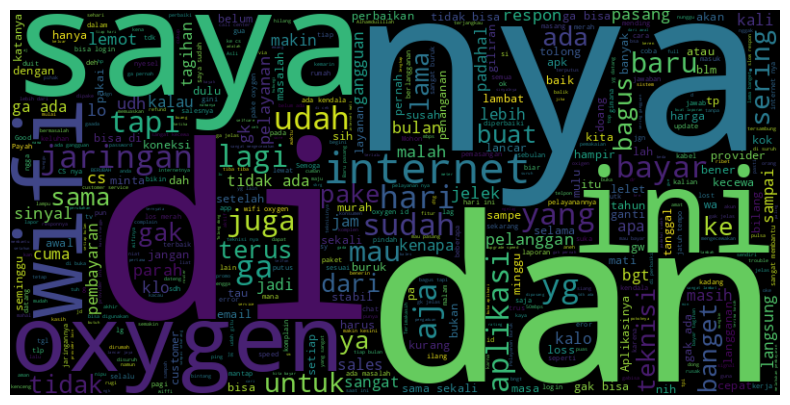

In [14]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

df['Review Text'] = df['Review Text'].fillna('')

text = ' '.join(df['Review Text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

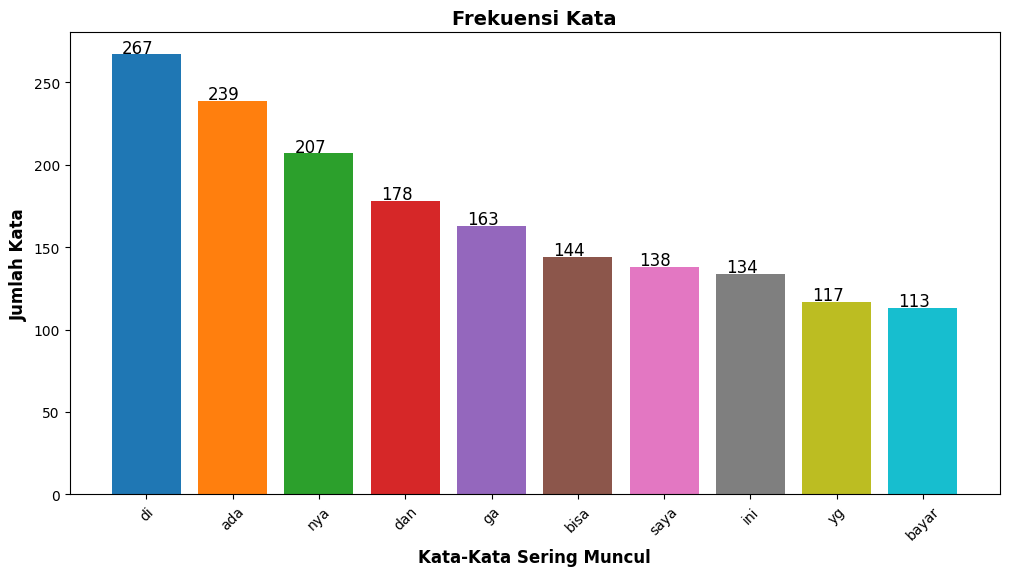

In [15]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["Review Text"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

for bar, num in zip(bars, count):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')


plt.show()

In [16]:
import re
import string
import nltk

def remove_URL(tweet):
  if tweet is not None and isinstance(tweet, str):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)
  else:
    return tweet

def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
      html = re.compile(r'<.*?>')
      return html.sub(r'', tweet)
    else:
      return tweet

def remove_emoji(tweet):
  if tweet is not None and isinstance(tweet, str):
     emoji_pattern = re.compile("["
          u"\U0001F600-\U0001F64F" # emoticons
          u"\U0001F300-\U0001F5FF" # symbols & pictographs
          u"\U0001F680-\U0001F6FF" # transport & map symbols
          u"\U0001F700-\U0001F77F" # alchemical symbols
          u"\U0001F780-\U0001F7FF" # Geometric Shapes Extended
          u"\U0001F800-\U0001F8FF" # Supplemental Arrows-C
          u"\U0001F900-\U0001F9FF" # Supplemental Symbols and Pictographs
          u"\U0001FA00-\U0001FA6F" # Chess Symbols
          u"\U0001FA70-\U0001FAFF" # Symbols and Pictographs Extended-A
          u"\U0001F004-\U0001F0CF" # Additional emoticons
          u"\U0001F1E0-\U0001F1FF" # flags
                             "]+", flags=re.UNICODE)
     return emoji_pattern.sub(r'', tweet) # This line was indented one level too deep
  else:
      return tweet

def remove_symbols(tweet):
  if tweet is not None and isinstance(tweet, str):
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

def remove_numbers(tweet):
  if tweet is not None and isinstance(tweet, str):
    tweet = re.sub(r'\d', '', tweet)
    return tweet


df ['cleaning'] = df['Review Text'].apply(lambda x: remove_URL(x))
df ['cleaning'] = df['cleaning']. apply(lambda x: remove_html(x))
df ['cleaning'] = df['cleaning']. apply(lambda x: remove_emoji (x))
df ['cleaning'] = df['cleaning']. apply(lambda x: remove_symbols(x))
df ['cleaning'] = df['cleaning']. apply(lambda x: remove_numbers(x))

df.head(10)


,Date,Username,Rating,Review Text,cleaning
0,2025-04-06 01:38:03,pikirii,1,"ini respon nya memang selama itu?, setiap baya...",ini respon nya memang selama itu setiap bayar ...
1,2025-04-04 10:18:17,Mario Samego,4,Mohon ditambah fitur-fitur seperti self upgrad...,Mohon ditambah fiturfitur seperti self upgrade...
2,2025-04-03 01:14:47,Sierra Oscar,3,"Pelayanan lelet, pengaduan lelet, tehnisi lele...",Pelayanan lelet pengaduan lelet tehnisi lelet ...
3,2025-04-03 01:14:11,Ade Irna Ikballah,1,Akhir akhir ini sering internet LOS (Putus) 4x...,Akhir akhir ini sering internet LOS Putus x da...
4,2025-04-02 07:06:24,Abdillah Alexx,2,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...
5,2025-03-26 02:56:05,Hadisti Arianti,2,pembaharuan mulu tiap bulan heran,pembaharuan mulu tiap bulan heran
6,2025-03-25 23:17:51,Imam Gumilar,1,"sinyal makin sini makin jelek, keluhan lama bu...",sinyal makin sini makin jelek keluhan lama bua...
7,2025-03-25 06:02:25,Shahih Bukhari,5,provider yang bagus banget jaringan dan harga ...,provider yang bagus banget jaringan dan harga ...
8,2025-03-22 20:48:48,Widodo Widodo,1,saya kecewa baru bayar 306.000 trus ada pemutu...,saya kecewa baru bayar trus ada pemutusan sep...
9,2025-03-21 22:34:50,Rudi Anto,1,ini aplikasi baru beberapa hari sudah update j...,ini aplikasi baru beberapa hari sudah update j...


In [17]:
def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text

  else:
    return text

df['case folding'] = df['cleaning'].apply(case_folding)
df.head(5)

,Date,Username,Rating,Review Text,cleaning,case folding
0,2025-04-06 01:38:03,pikirii,1,"ini respon nya memang selama itu?, setiap baya...",ini respon nya memang selama itu setiap bayar ...,ini respon nya memang selama itu setiap bayar ...
1,2025-04-04 10:18:17,Mario Samego,4,Mohon ditambah fitur-fitur seperti self upgrad...,Mohon ditambah fiturfitur seperti self upgrade...,mohon ditambah fiturfitur seperti self upgrade...
2,2025-04-03 01:14:47,Sierra Oscar,3,"Pelayanan lelet, pengaduan lelet, tehnisi lele...",Pelayanan lelet pengaduan lelet tehnisi lelet ...,pelayanan lelet pengaduan lelet tehnisi lelet ...
3,2025-04-03 01:14:11,Ade Irna Ikballah,1,Akhir akhir ini sering internet LOS (Putus) 4x...,Akhir akhir ini sering internet LOS Putus x da...,akhir akhir ini sering internet los putus x da...
4,2025-04-02 07:06:24,Abdillah Alexx,2,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...


In [18]:
import pandas as pd

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)

        replaced_text = ' '.join(replaced_words)

    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash


In [19]:
data = pd.DataFrame(df[['Date','Username','Rating','Review Text','cleaning','case folding']])
data.head(5)

,Date,Username,Rating,Review Text,cleaning,case folding
0,2025-04-06 01:38:03,pikirii,1,"ini respon nya memang selama itu?, setiap baya...",ini respon nya memang selama itu setiap bayar ...,ini respon nya memang selama itu setiap bayar ...
1,2025-04-04 10:18:17,Mario Samego,4,Mohon ditambah fitur-fitur seperti self upgrad...,Mohon ditambah fiturfitur seperti self upgrade...,mohon ditambah fiturfitur seperti self upgrade...
2,2025-04-03 01:14:47,Sierra Oscar,3,"Pelayanan lelet, pengaduan lelet, tehnisi lele...",Pelayanan lelet pengaduan lelet tehnisi lelet ...,pelayanan lelet pengaduan lelet tehnisi lelet ...
3,2025-04-03 01:14:11,Ade Irna Ikballah,1,Akhir akhir ini sering internet LOS (Putus) 4x...,Akhir akhir ini sering internet LOS Putus x da...,akhir akhir ini sering internet los putus x da...
4,2025-04-02 07:06:24,Abdillah Alexx,2,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...


In [20]:
kamus_data = pd.read_excel("kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [21]:
# Terapkan fungsi penggantian kata tidak baku
data['normalisasi'], data['kalimat_baku'], data['kata_diganti'], data['kata_tidak_baku_hash'] = zip(*data['case folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))
# data.head(100)

df = pd.DataFrame(data[['Date','Username','Rating','Review Text','cleaning','case folding','normalisasi']])

df.head(20)

,Date,Username,Rating,Review Text,cleaning,case folding,normalisasi
0,2025-04-06 01:38:03,pikirii,1,"ini respon nya memang selama itu?, setiap baya...",ini respon nya memang selama itu setiap bayar ...,ini respon nya memang selama itu setiap bayar ...,ini respon ya memang selama itu setiap bayar p...
1,2025-04-04 10:18:17,Mario Samego,4,Mohon ditambah fitur-fitur seperti self upgrad...,Mohon ditambah fiturfitur seperti self upgrade...,mohon ditambah fiturfitur seperti self upgrade...,mohon ditambah fiturfitur seperti self upgrade...
2,2025-04-03 01:14:47,Sierra Oscar,3,"Pelayanan lelet, pengaduan lelet, tehnisi lele...",Pelayanan lelet pengaduan lelet tehnisi lelet ...,pelayanan lelet pengaduan lelet tehnisi lelet ...,pelayanan lelet pengaduan lelet tehnisi lelet ...
3,2025-04-03 01:14:11,Ade Irna Ikballah,1,Akhir akhir ini sering internet LOS (Putus) 4x...,Akhir akhir ini sering internet LOS Putus x da...,akhir akhir ini sering internet los putus x da...,akhir akhir ini sering internet los putus kali...
4,2025-04-02 07:06:24,Abdillah Alexx,2,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...
5,2025-03-26 02:56:05,Hadisti Arianti,2,pembaharuan mulu tiap bulan heran,pembaharuan mulu tiap bulan heran,pembaharuan mulu tiap bulan heran,pembaharuan mulu tiap bulan heran
6,2025-03-25 23:17:51,Imam Gumilar,1,"sinyal makin sini makin jelek, keluhan lama bu...",sinyal makin sini makin jelek keluhan lama bua...,sinyal makin sini makin jelek keluhan lama bua...,sinyal makin sini makin jelek keluhan lama bua...
7,2025-03-25 06:02:25,Shahih Bukhari,5,provider yang bagus banget jaringan dan harga ...,provider yang bagus banget jaringan dan harga ...,provider yang bagus banget jaringan dan harga ...,provider yang bagus banget jaringan dan harga ...
8,2025-03-22 20:48:48,Widodo Widodo,1,saya kecewa baru bayar 306.000 trus ada pemutu...,saya kecewa baru bayar trus ada pemutusan sep...,saya kecewa baru bayar trus ada pemutusan sep...,saya kecewa baru bayar terus ada pemutusan sep...
9,2025-03-21 22:34:50,Rudi Anto,1,ini aplikasi baru beberapa hari sudah update j...,ini aplikasi baru beberapa hari sudah update j...,ini aplikasi baru beberapa hari sudah update j...,ini aplikasi baru beberapa hari sudah update s...


In [22]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

,Date,Username,Rating,Review Text,cleaning,case folding,normalisasi,tokenize
0,2025-04-06 01:38:03,pikirii,1,"ini respon nya memang selama itu?, setiap baya...",ini respon nya memang selama itu setiap bayar ...,ini respon nya memang selama itu setiap bayar ...,ini respon ya memang selama itu setiap bayar p...,"[ini, respon, ya, memang, selama, itu, setiap,..."
1,2025-04-04 10:18:17,Mario Samego,4,Mohon ditambah fitur-fitur seperti self upgrad...,Mohon ditambah fiturfitur seperti self upgrade...,mohon ditambah fiturfitur seperti self upgrade...,mohon ditambah fiturfitur seperti self upgrade...,"[mohon, ditambah, fiturfitur, seperti, self, u..."
2,2025-04-03 01:14:47,Sierra Oscar,3,"Pelayanan lelet, pengaduan lelet, tehnisi lele...",Pelayanan lelet pengaduan lelet tehnisi lelet ...,pelayanan lelet pengaduan lelet tehnisi lelet ...,pelayanan lelet pengaduan lelet tehnisi lelet ...,"[pelayanan, lelet, pengaduan, lelet, tehnisi, ..."
3,2025-04-03 01:14:11,Ade Irna Ikballah,1,Akhir akhir ini sering internet LOS (Putus) 4x...,Akhir akhir ini sering internet LOS Putus x da...,akhir akhir ini sering internet los putus x da...,akhir akhir ini sering internet los putus kali...,"[akhir, akhir, ini, sering, internet, los, put..."
4,2025-04-02 07:06:24,Abdillah Alexx,2,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,"[apk, kurang, akurat, sehinga, pembayaran, ser..."


In [23]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(5)

,Date,Username,Rating,Review Text,cleaning,case folding,normalisasi,tokenize,stopword removal
0,2025-04-06 01:38:03,pikirii,1,"ini respon nya memang selama itu?, setiap baya...",ini respon nya memang selama itu setiap bayar ...,ini respon nya memang selama itu setiap bayar ...,ini respon ya memang selama itu setiap bayar p...,"[ini, respon, ya, memang, selama, itu, setiap,...","[respon, ya, bayar, menunggu, jam, biar, inter..."
1,2025-04-04 10:18:17,Mario Samego,4,Mohon ditambah fitur-fitur seperti self upgrad...,Mohon ditambah fiturfitur seperti self upgrade...,mohon ditambah fiturfitur seperti self upgrade...,mohon ditambah fiturfitur seperti self upgrade...,"[mohon, ditambah, fiturfitur, seperti, self, u...","[mohon, ditambah, fiturfitur, self, upgrade, s..."
2,2025-04-03 01:14:47,Sierra Oscar,3,"Pelayanan lelet, pengaduan lelet, tehnisi lele...",Pelayanan lelet pengaduan lelet tehnisi lelet ...,pelayanan lelet pengaduan lelet tehnisi lelet ...,pelayanan lelet pengaduan lelet tehnisi lelet ...,"[pelayanan, lelet, pengaduan, lelet, tehnisi, ...","[pelayanan, lelet, pengaduan, lelet, tehnisi, ..."
3,2025-04-03 01:14:11,Ade Irna Ikballah,1,Akhir akhir ini sering internet LOS (Putus) 4x...,Akhir akhir ini sering internet LOS Putus x da...,akhir akhir ini sering internet los putus x da...,akhir akhir ini sering internet los putus kali...,"[akhir, akhir, ini, sering, internet, los, put...","[internet, los, putus, kali, durasi, sebulan, ..."
4,2025-04-02 07:06:24,Abdillah Alexx,2,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,"[apk, kurang, akurat, sehinga, pembayaran, ser...","[apk, akurat, sehinga, pembayaran, salah, bayar]"


In [25]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [26]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,Date,Username,Rating,Review Text,cleaning,case folding,normalisasi,tokenize,stopword removal,steming_data
0,2025-04-06 01:38:03,pikirii,1,"ini respon nya memang selama itu?, setiap baya...",ini respon nya memang selama itu setiap bayar ...,ini respon nya memang selama itu setiap bayar ...,ini respon ya memang selama itu setiap bayar p...,"[ini, respon, ya, memang, selama, itu, setiap,...","[respon, ya, bayar, menunggu, jam, biar, inter...",respon ya bayar tunggu jam biar internet ya hi...
1,2025-04-04 10:18:17,Mario Samego,4,Mohon ditambah fitur-fitur seperti self upgrad...,Mohon ditambah fiturfitur seperti self upgrade...,mohon ditambah fiturfitur seperti self upgrade...,mohon ditambah fiturfitur seperti self upgrade...,"[mohon, ditambah, fiturfitur, seperti, self, u...","[mohon, ditambah, fiturfitur, self, upgrade, s...",mohon tambah fiturfitur self upgrade speed dll
2,2025-04-03 01:14:47,Sierra Oscar,3,"Pelayanan lelet, pengaduan lelet, tehnisi lele...",Pelayanan lelet pengaduan lelet tehnisi lelet ...,pelayanan lelet pengaduan lelet tehnisi lelet ...,pelayanan lelet pengaduan lelet tehnisi lelet ...,"[pelayanan, lelet, pengaduan, lelet, tehnisi, ...","[pelayanan, lelet, pengaduan, lelet, tehnisi, ...",layan lelet adu lelet tehnisi lelet duit gercep
3,2025-04-03 01:14:11,Ade Irna Ikballah,1,Akhir akhir ini sering internet LOS (Putus) 4x...,Akhir akhir ini sering internet LOS Putus x da...,akhir akhir ini sering internet los putus x da...,akhir akhir ini sering internet los putus kali...,"[akhir, akhir, ini, sering, internet, los, put...","[internet, los, putus, kali, durasi, sebulan, ...",internet los putus kali durasi bulan responnya...
4,2025-04-02 07:06:24,Abdillah Alexx,2,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,"[apk, kurang, akurat, sehinga, pembayaran, ser...","[apk, akurat, sehinga, pembayaran, salah, bayar]",apk akurat sehinga bayar salah bayar


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 861 entries, 0 to 888
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              861 non-null    object
 1   Username          861 non-null    object
 2   Rating            861 non-null    int64 
 3   Review Text       861 non-null    object
 4   cleaning          861 non-null    object
 5   case folding      861 non-null    object
 6   normalisasi       861 non-null    object
 7   tokenize          861 non-null    object
 8   stopword removal  861 non-null    object
 9   steming_data      861 non-null    object
dtypes: int64(1), object(9)
memory usage: 106.3+ KB


In [28]:
df.to_csv('Hasil_Preprocessing_Data.csv',encoding='utf8', index=False);

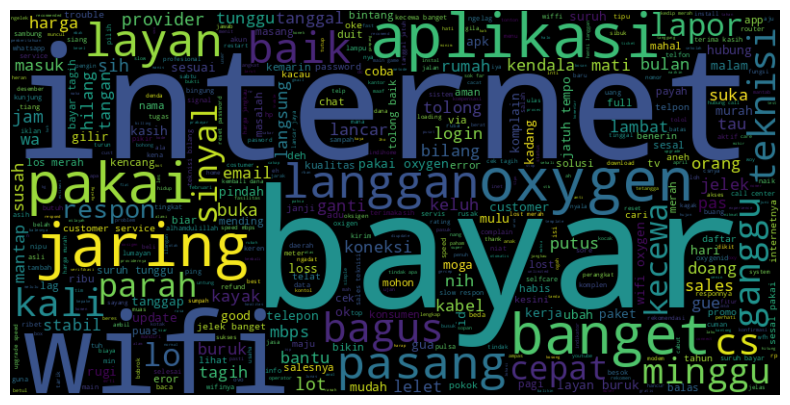

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt



# Access the 'stemming_data' column from the 'data' DataFrame
text = ' '.join(df['steming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'ya'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

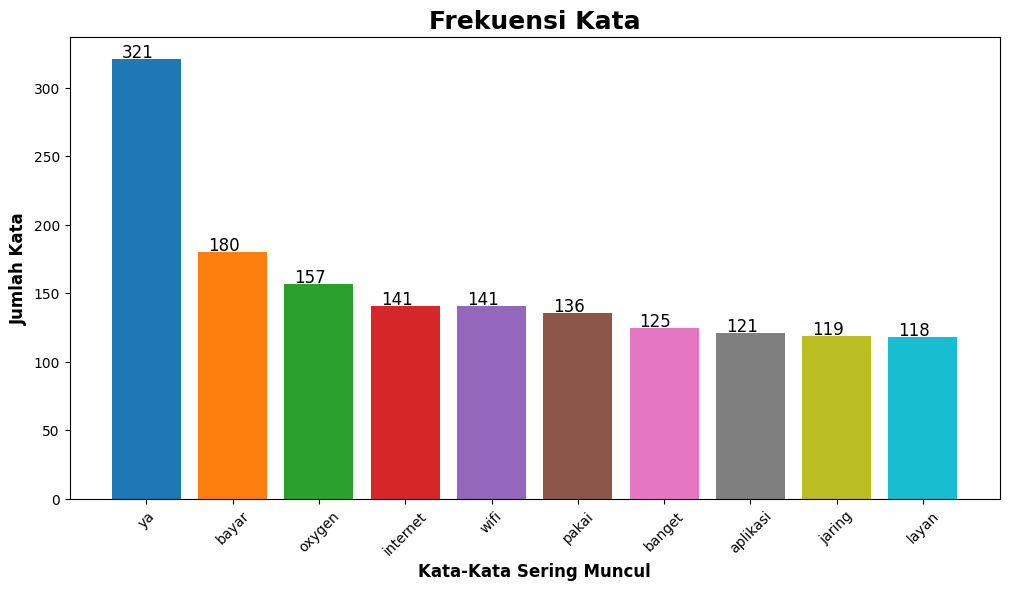

In [29]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["steming_data"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)


# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()

In [30]:
import pandas as pd

data = pd.read_csv('Hasil_Preprocessing_Data.csv')
data.head(5)

,Date,Username,Rating,Review Text,cleaning,case folding,normalisasi,tokenize,stopword removal,steming_data
0,2025-04-06 01:38:03,pikirii,1,"ini respon nya memang selama itu?, setiap baya...",ini respon nya memang selama itu setiap bayar ...,ini respon nya memang selama itu setiap bayar ...,ini respon ya memang selama itu setiap bayar p...,"['ini', 'respon', 'ya', 'memang', 'selama', 'i...","['respon', 'ya', 'bayar', 'menunggu', 'jam', '...",respon ya bayar tunggu jam biar internet ya hi...
1,2025-04-04 10:18:17,Mario Samego,4,Mohon ditambah fitur-fitur seperti self upgrad...,Mohon ditambah fiturfitur seperti self upgrade...,mohon ditambah fiturfitur seperti self upgrade...,mohon ditambah fiturfitur seperti self upgrade...,"['mohon', 'ditambah', 'fiturfitur', 'seperti',...","['mohon', 'ditambah', 'fiturfitur', 'self', 'u...",mohon tambah fiturfitur self upgrade speed dll
2,2025-04-03 01:14:47,Sierra Oscar,3,"Pelayanan lelet, pengaduan lelet, tehnisi lele...",Pelayanan lelet pengaduan lelet tehnisi lelet ...,pelayanan lelet pengaduan lelet tehnisi lelet ...,pelayanan lelet pengaduan lelet tehnisi lelet ...,"['pelayanan', 'lelet', 'pengaduan', 'lelet', '...","['pelayanan', 'lelet', 'pengaduan', 'lelet', '...",layan lelet adu lelet tehnisi lelet duit gercep
3,2025-04-03 01:14:11,Ade Irna Ikballah,1,Akhir akhir ini sering internet LOS (Putus) 4x...,Akhir akhir ini sering internet LOS Putus x da...,akhir akhir ini sering internet los putus x da...,akhir akhir ini sering internet los putus kali...,"['akhir', 'akhir', 'ini', 'sering', 'internet'...","['internet', 'los', 'putus', 'kali', 'durasi',...",internet los putus kali durasi bulan responnya...
4,2025-04-02 07:06:24,Abdillah Alexx,2,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,"['apk', 'kurang', 'akurat', 'sehinga', 'pembay...","['apk', 'akurat', 'sehinga', 'pembayaran', 'sa...",apk akurat sehinga bayar salah bayar


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              861 non-null    object
 1   Username          861 non-null    object
 2   Rating            861 non-null    int64 
 3   Review Text       861 non-null    object
 4   cleaning          857 non-null    object
 5   case folding      857 non-null    object
 6   normalisasi       857 non-null    object
 7   tokenize          861 non-null    object
 8   stopword removal  861 non-null    object
 9   steming_data      854 non-null    object
dtypes: int64(1), object(9)
memory usage: 67.4+ KB


In [32]:
df = data.dropna()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 854 entries, 0 to 860
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              854 non-null    object
 1   Username          854 non-null    object
 2   Rating            854 non-null    int64 
 3   Review Text       854 non-null    object
 4   cleaning          854 non-null    object
 5   case folding      854 non-null    object
 6   normalisasi       854 non-null    object
 7   tokenize          854 non-null    object
 8   stopword removal  854 non-null    object
 9   steming_data      854 non-null    object
dtypes: int64(1), object(9)
memory usage: 73.4+ KB


In [34]:
import pandas as pd

def determine_sentiment(text):
  positive_count = sum(1 for word in text.split() if word in positive_lexicon)
  negative_count = sum(1 for word in text.split() if word in negative_lexicon)
  if positive_count > negative_count:
    return "Positif"
  elif positive_count < negative_count:
    return "Negatif"

positive_lexicon = set(pd.read_csv("positive.tsv", sep="\t", header=None) [0])
negative_lexicon = set(pd.read_csv("negative.tsv", sep="\t", header=None) [0])

def replace_none_sentiment(sentiments):
  replace_flag = "Positif"
  for i in range(len(sentiments)):
    if sentiments[i] is None:
      sentiments[i] = replace_flag
      replace_flag = "Negatif" if replace_flag == "Positif" else "Positif"
  return sentiments

df ['Sentiment' ] = df ['steming_data' ].apply(determine_sentiment)
df ['Sentiment' ] = replace_none_sentiment(df['Sentiment' ].tolist())

df.head( )





<ipython-input-34-624bea88e23c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['Sentiment' ] = df ['steming_data' ].apply(determine_sentiment)
<ipython-input-34-624bea88e23c>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['Sentiment' ] = replace_none_sentiment(df['Sentiment' ].tolist())


,Date,Username,Rating,Review Text,cleaning,case folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,2025-04-06 01:38:03,pikirii,1,"ini respon nya memang selama itu?, setiap baya...",ini respon nya memang selama itu setiap bayar ...,ini respon nya memang selama itu setiap bayar ...,ini respon ya memang selama itu setiap bayar p...,"['ini', 'respon', 'ya', 'memang', 'selama', 'i...","['respon', 'ya', 'bayar', 'menunggu', 'jam', '...",respon ya bayar tunggu jam biar internet ya hi...,Positif
1,2025-04-04 10:18:17,Mario Samego,4,Mohon ditambah fitur-fitur seperti self upgrad...,Mohon ditambah fiturfitur seperti self upgrade...,mohon ditambah fiturfitur seperti self upgrade...,mohon ditambah fiturfitur seperti self upgrade...,"['mohon', 'ditambah', 'fiturfitur', 'seperti',...","['mohon', 'ditambah', 'fiturfitur', 'self', 'u...",mohon tambah fiturfitur self upgrade speed dll,Positif
2,2025-04-03 01:14:47,Sierra Oscar,3,"Pelayanan lelet, pengaduan lelet, tehnisi lele...",Pelayanan lelet pengaduan lelet tehnisi lelet ...,pelayanan lelet pengaduan lelet tehnisi lelet ...,pelayanan lelet pengaduan lelet tehnisi lelet ...,"['pelayanan', 'lelet', 'pengaduan', 'lelet', '...","['pelayanan', 'lelet', 'pengaduan', 'lelet', '...",layan lelet adu lelet tehnisi lelet duit gercep,Negatif
3,2025-04-03 01:14:11,Ade Irna Ikballah,1,Akhir akhir ini sering internet LOS (Putus) 4x...,Akhir akhir ini sering internet LOS Putus x da...,akhir akhir ini sering internet los putus x da...,akhir akhir ini sering internet los putus kali...,"['akhir', 'akhir', 'ini', 'sering', 'internet'...","['internet', 'los', 'putus', 'kali', 'durasi',...",internet los putus kali durasi bulan responnya...,Positif
4,2025-04-02 07:06:24,Abdillah Alexx,2,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,"['apk', 'kurang', 'akurat', 'sehinga', 'pembay...","['apk', 'akurat', 'sehinga', 'pembayaran', 'sa...",apk akurat sehinga bayar salah bayar,Negatif


<ipython-input-35-2d3d2a010394>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count. index, y=sentiment_count.values, palette='pastel')


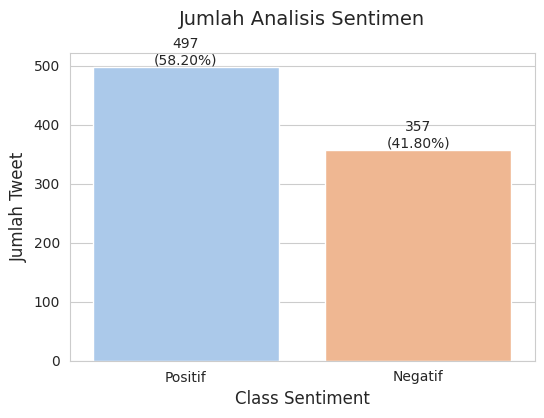

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = df[ 'Sentiment' ]. value_counts ()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count. index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(df['Sentiment'])

for i, count in enumerate(sentiment_count.values):
  percentage = f'{100 * count / total:.2f}%'
  ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt. show()

In [38]:
df.to_csv('Hasil_Labelling_Data.csv', encoding='utf8', index=False)

In [39]:
import pandas as pd

data = pd.read_csv('Hasil_Labelling_Data.csv')
data.head()

,Date,Username,Rating,Review Text,cleaning,case folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,2025-04-06 01:38:03,pikirii,1,"ini respon nya memang selama itu?, setiap baya...",ini respon nya memang selama itu setiap bayar ...,ini respon nya memang selama itu setiap bayar ...,ini respon ya memang selama itu setiap bayar p...,"['ini', 'respon', 'ya', 'memang', 'selama', 'i...","['respon', 'ya', 'bayar', 'menunggu', 'jam', '...",respon ya bayar tunggu jam biar internet ya hi...,Positif
1,2025-04-04 10:18:17,Mario Samego,4,Mohon ditambah fitur-fitur seperti self upgrad...,Mohon ditambah fiturfitur seperti self upgrade...,mohon ditambah fiturfitur seperti self upgrade...,mohon ditambah fiturfitur seperti self upgrade...,"['mohon', 'ditambah', 'fiturfitur', 'seperti',...","['mohon', 'ditambah', 'fiturfitur', 'self', 'u...",mohon tambah fiturfitur self upgrade speed dll,Positif
2,2025-04-03 01:14:47,Sierra Oscar,3,"Pelayanan lelet, pengaduan lelet, tehnisi lele...",Pelayanan lelet pengaduan lelet tehnisi lelet ...,pelayanan lelet pengaduan lelet tehnisi lelet ...,pelayanan lelet pengaduan lelet tehnisi lelet ...,"['pelayanan', 'lelet', 'pengaduan', 'lelet', '...","['pelayanan', 'lelet', 'pengaduan', 'lelet', '...",layan lelet adu lelet tehnisi lelet duit gercep,Negatif
3,2025-04-03 01:14:11,Ade Irna Ikballah,1,Akhir akhir ini sering internet LOS (Putus) 4x...,Akhir akhir ini sering internet LOS Putus x da...,akhir akhir ini sering internet los putus x da...,akhir akhir ini sering internet los putus kali...,"['akhir', 'akhir', 'ini', 'sering', 'internet'...","['internet', 'los', 'putus', 'kali', 'durasi',...",internet los putus kali durasi bulan responnya...,Positif
4,2025-04-02 07:06:24,Abdillah Alexx,2,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,"['apk', 'kurang', 'akurat', 'sehinga', 'pembay...","['apk', 'akurat', 'sehinga', 'pembayaran', 'sa...",apk akurat sehinga bayar salah bayar,Negatif


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              854 non-null    object
 1   Username          854 non-null    object
 2   Rating            854 non-null    int64 
 3   Review Text       854 non-null    object
 4   cleaning          854 non-null    object
 5   case folding      854 non-null    object
 6   normalisasi       854 non-null    object
 7   tokenize          854 non-null    object
 8   stopword removal  854 non-null    object
 9   steming_data      854 non-null    object
 10  Sentiment         854 non-null    object
dtypes: int64(1), object(10)
memory usage: 73.5+ KB


In [41]:
df = data.dropna()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              854 non-null    object
 1   Username          854 non-null    object
 2   Rating            854 non-null    int64 
 3   Review Text       854 non-null    object
 4   cleaning          854 non-null    object
 5   case folding      854 non-null    object
 6   normalisasi       854 non-null    object
 7   tokenize          854 non-null    object
 8   stopword removal  854 non-null    object
 9   steming_data      854 non-null    object
 10  Sentiment         854 non-null    object
dtypes: int64(1), object(10)
memory usage: 73.5+ KB


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['steming_data'], df['Sentiment'], test_size=0.2, random_state=42)

In [44]:
train_set = pd.DataFrame({'text': X_train, 'sentiment' : y_train})
train_set.to_csv('train_data.csv', index=False)

In [45]:
test_set = pd.DataFrame({'text': X_test, 'sentiment' : y_test})
test_set.to_csv('test_data.csv', index=False)

In [46]:
print(f'Jumlah Data Latih: {len(X_train)}')
print(f'Jumlah Data Uji: {len(X_test)}')

Jumlah Data Latih: 683
Jumlah Data Uji: 171


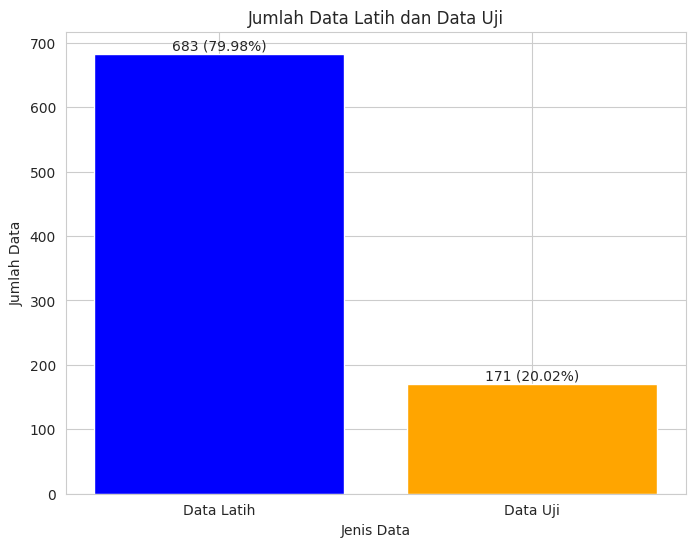

In [47]:
import matplotlib.pyplot as plt

train_size = len(X_train)
test_size = len(X_test)

plt.figure(figsize=(8, 6))
bars = plt.bar(['Data Latih', 'Data Uji'], [train_size, test_size], color=['blue', 'orange'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.7, f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()


In [48]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [49]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [50]:
print("Matriks Vektorisasi untuk Data Latih: ")
print(X_train_vectorized.toarray())

print("\nSebagian kecil Matriks Vektorisasi untuk Data Latih: ")
print(X_train_vectorized[:5, :].toarray())

Matriks Vektorisasi untuk Data Latih: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Sebagian kecil Matriks Vektorisasi untuk Data Latih: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [51]:
svm = SVC(kernel='linear')
svm.fit(X_train_vectorized, y_train)

SVC(kernel='linear')

In [52]:
y_pred_svm = svm.predict(X_test_vectorized)

In [53]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(cm_svm)

SVM Confusion Matrix:
[[48 20]
 [14 89]]


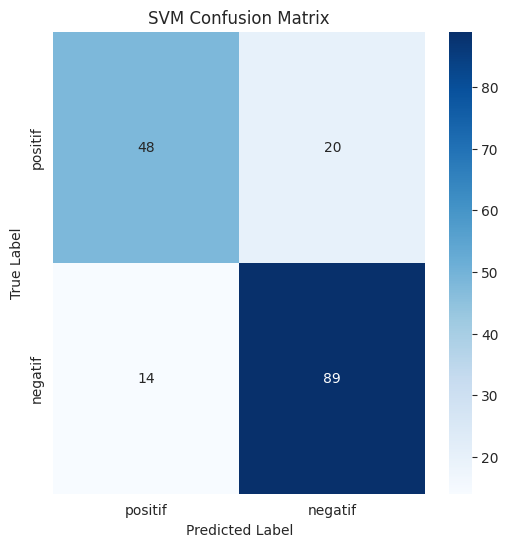

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['positif', 'negatif'],
                yticklabels=['positif', 'negatif'])

    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Example usage: Ensure y_test and y_pred_svm are already defined
plot_confusion_matrix("SVM", y_test, y_pred_svm)


In [55]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("")

accuracy_svm_percentage = accuracy_svm * 100
print("SVM Accuaracy:", "{:.2f}%".format(accuracy_svm_percentage))
print("")

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8011695906432749

SVM Accuaracy: 80.12%

SVM Classification Report:
              precision    recall  f1-score   support

     Negatif       0.77      0.71      0.74        68
     Positif       0.82      0.86      0.84       103

    accuracy                           0.80       171
   macro avg       0.80      0.78      0.79       171
weighted avg       0.80      0.80      0.80       171



In [56]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data.csv")
data.head()

,Date,Username,Rating,Review Text,cleaning,case folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,2025-04-06 01:38:03,pikirii,1,"ini respon nya memang selama itu?, setiap baya...",ini respon nya memang selama itu setiap bayar ...,ini respon nya memang selama itu setiap bayar ...,ini respon ya memang selama itu setiap bayar p...,"['ini', 'respon', 'ya', 'memang', 'selama', 'i...","['respon', 'ya', 'bayar', 'menunggu', 'jam', '...",respon ya bayar tunggu jam biar internet ya hi...,Positif
1,2025-04-04 10:18:17,Mario Samego,4,Mohon ditambah fitur-fitur seperti self upgrad...,Mohon ditambah fiturfitur seperti self upgrade...,mohon ditambah fiturfitur seperti self upgrade...,mohon ditambah fiturfitur seperti self upgrade...,"['mohon', 'ditambah', 'fiturfitur', 'seperti',...","['mohon', 'ditambah', 'fiturfitur', 'self', 'u...",mohon tambah fiturfitur self upgrade speed dll,Positif
2,2025-04-03 01:14:47,Sierra Oscar,3,"Pelayanan lelet, pengaduan lelet, tehnisi lele...",Pelayanan lelet pengaduan lelet tehnisi lelet ...,pelayanan lelet pengaduan lelet tehnisi lelet ...,pelayanan lelet pengaduan lelet tehnisi lelet ...,"['pelayanan', 'lelet', 'pengaduan', 'lelet', '...","['pelayanan', 'lelet', 'pengaduan', 'lelet', '...",layan lelet adu lelet tehnisi lelet duit gercep,Negatif
3,2025-04-03 01:14:11,Ade Irna Ikballah,1,Akhir akhir ini sering internet LOS (Putus) 4x...,Akhir akhir ini sering internet LOS Putus x da...,akhir akhir ini sering internet los putus x da...,akhir akhir ini sering internet los putus kali...,"['akhir', 'akhir', 'ini', 'sering', 'internet'...","['internet', 'los', 'putus', 'kali', 'durasi',...",internet los putus kali durasi bulan responnya...,Positif
4,2025-04-02 07:06:24,Abdillah Alexx,2,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,apk kurang akurat sehinga pembayaran sering sa...,"['apk', 'kurang', 'akurat', 'sehinga', 'pembay...","['apk', 'akurat', 'sehinga', 'pembayaran', 'sa...",apk akurat sehinga bayar salah bayar,Negatif


In [57]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sentimen_negatif = data[data['Sentiment' ] == 'Negatif'] ['steming_data']. str.cat(sep=' ')
sentimen_positif = data[data['Sentiment' ] == 'Positif']['steming_data'].str.cat(sep=' ')

In [58]:
def create_wordcloud(text, title):
  wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='black').generate(text)

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(title)
  plt.show()


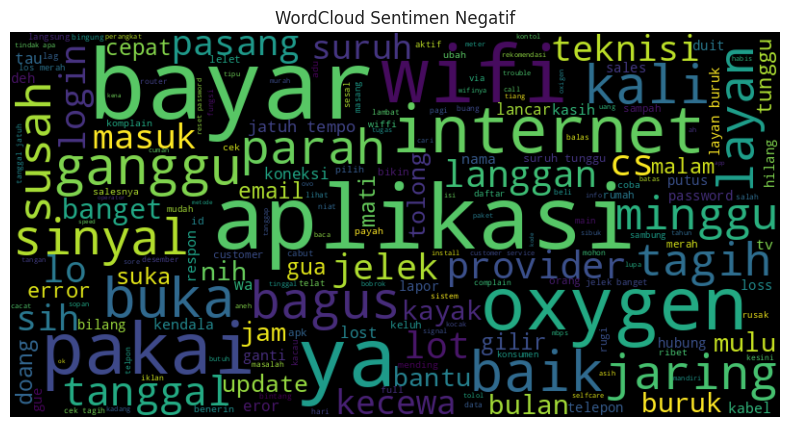

In [59]:
create_wordcloud(sentimen_negatif, 'WordCloud Sentimen Negatif')

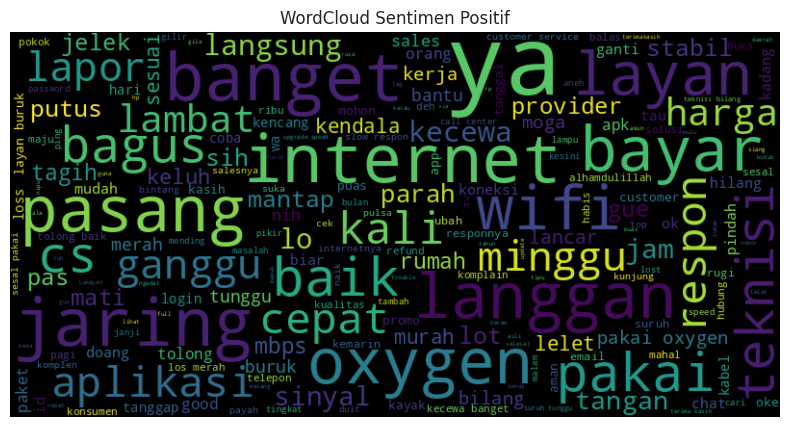

In [60]:
create_wordcloud(sentimen_positif, 'WordCloud Sentimen Positif')

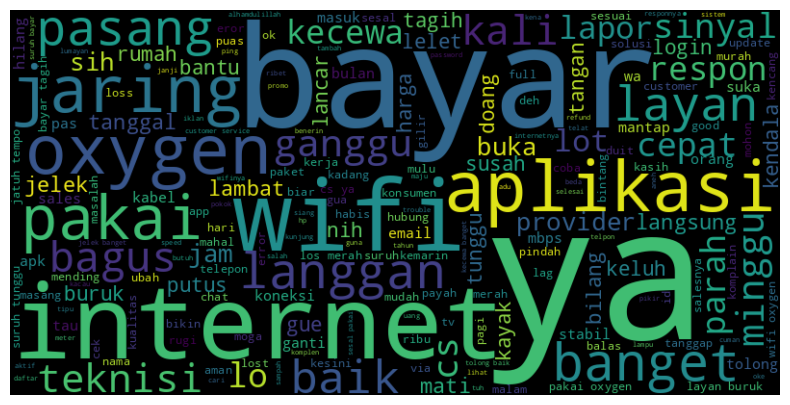

In [61]:
text = ' '.join(data['steming_data'].apply(lambda x: str(x) if isinstance(x, (str, int, float)) else''))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

In [62]:
import pandas as pd

data = pd.read_csv('Hasil_Labelling_Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              854 non-null    object
 1   Username          854 non-null    object
 2   Rating            854 non-null    int64 
 3   Review Text       854 non-null    object
 4   cleaning          854 non-null    object
 5   case folding      854 non-null    object
 6   normalisasi       854 non-null    object
 7   tokenize          854 non-null    object
 8   stopword removal  854 non-null    object
 9   steming_data      854 non-null    object
 10  Sentiment         854 non-null    object
dtypes: int64(1), object(10)
memory usage: 73.5+ KB


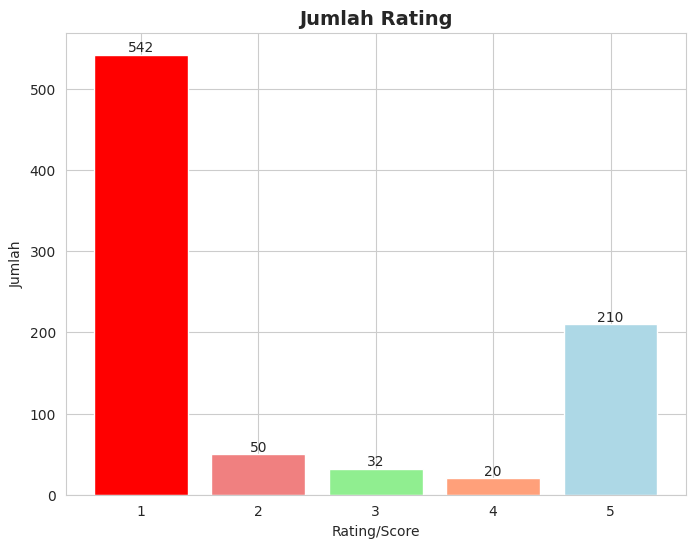

In [63]:
import matplotlib.pyplot as plt

rating_counts = data['Rating'].value_counts()
rating_counts = rating_counts.sort_index()

colors = ['red', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue']

plt.figure(figsize=(8,6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.title('Jumlah Rating', fontsize=14, fontweight='bold')
plt.xlabel('Rating/Score')
plt.ylabel('Jumlah')
plt.xticks(rating_counts.index)

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt. show()